In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


In [12]:
file_path = "Customer_Churn_Data_Large.xlsx"

# List all sheet names to understand data structure
excel_file = pd.ExcelFile(file_path)
print("Available Sheets:", excel_file.sheet_names)

# Load each sheet into separate DataFrames
demographics = pd.read_excel(file_path, sheet_name='Customer_Demographics')
transactions = pd.read_excel(file_path, sheet_name='Transaction_History')
service = pd.read_excel(file_path, sheet_name='Customer_Service')
activity = pd.read_excel(file_path, sheet_name='Online_Activity')
churn = pd.read_excel(file_path, sheet_name='Churn_Status')

# Preview each
display(demographics.head())
display(churn.head())


Available Sheets: ['Customer_Demographics', 'Transaction_History', 'Customer_Service', 'Online_Activity', 'Churn_Status']


,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium


,CustomerID,ChurnStatus
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [13]:
# STEP 3: Merge the Datasets
df = demographics.merge(transactions, on='CustomerID', how='left')
df = df.merge(service, on='CustomerID', how='left')
df = df.merge(activity, on='CustomerID', how='left')
df = df.merge(churn, on='CustomerID', how='left')

print("Merged dataset shape:", df.shape)
display(df.head())


Merged dataset shape: (6812, 17)


,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1


In [14]:
# STEP 4: Initial Data Exploration
df.info()

# Summary statistics
display(df.describe(include='all'))

# Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:")
display(missing.head(15))

# Check target balance
if 'Churn' in df.columns:
    print("\nChurn distribution:")
    print(df['Churn'].value_counts(normalize=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        6812 non-null   int64         
 1   Age               6812 non-null   int64         
 2   Gender            6812 non-null   object        
 3   MaritalStatus     6812 non-null   object        
 4   IncomeLevel       6812 non-null   object        
 5   TransactionID     6812 non-null   int64         
 6   TransactionDate   6812 non-null   datetime64[ns]
 7   AmountSpent       6812 non-null   float64       
 8   ProductCategory   6812 non-null   object        
 9   InteractionID     5204 non-null   float64       
 10  InteractionDate   5204 non-null   datetime64[ns]
 11  InteractionType   5204 non-null   object        
 12  ResolutionStatus  5204 non-null   object        
 13  LastLoginDate     6812 non-null   datetime64[ns]
 14  LoginFrequency    6812 n

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
count,6812.000000,6812.000000,6812,6812,6812,6812.000000,6812,6812.000000,6812,5204.000000,5204,5204,5204,6812,6812.000000,6812,6812.000000
unique,NaN,NaN,2,4,3,NaN,NaN,NaN,5,NaN,NaN,3,2,NaN,NaN,3,NaN
top,NaN,NaN,F,Widowed,High,NaN,NaN,NaN,Books,NaN,NaN,Feedback,Resolved,NaN,NaN,Online Banking,NaN
freq,NaN,NaN,3580,1896,2340,NaN,NaN,NaN,1408,NaN,NaN,1921,2693,NaN,NaN,2419,NaN
mean,500.169260,43.274516,NaN,NaN,NaN,5497.323253,2022-07-01 02:11:29.136817408,251.620527,NaN,5921.861261,2022-07-01 16:31:10.561106944,NaN,NaN,2023-07-06 04:56:47.633587712,25.724310,NaN,0.198473
min,1.000000,18.000000,NaN,NaN,NaN,1000.000000,2022-01-01 00:00:00,5.180000,NaN,2015.000000,2022-01-01 00:00:00,NaN,NaN,2023-01-01 00:00:00,1.000000,NaN,0.000000
25%,247.000000,30.000000,NaN,NaN,NaN,3223.500000,2022-04-02 00:00:00,127.100000,NaN,3873.250000,2022-04-07 00:00:00,NaN,NaN,2023-04-12 00:00:00,14.000000,NaN,0.000000
50%,505.500000,44.000000,NaN,NaN,NaN,5515.000000,2022-07-01 00:00:00,251.845000,NaN,5903.000000,2022-07-02 00:00:00,NaN,NaN,2023-07-13 00:00:00,26.000000,NaN,0.000000
75%,750.000000,56.000000,NaN,NaN,NaN,7675.250000,2022-09-30 00:00:00,375.280000,NaN,7851.000000,2022-09-25 00:00:00,NaN,NaN,2023-10-01 00:00:00,38.000000,NaN,0.000000
max,1000.000000,69.000000,NaN,NaN,NaN,9997.000000,2022-12-31 00:00:00,499.860000,NaN,9997.000000,2022-12-30 00:00:00,NaN,NaN,2023-12-31 00:00:00,49.000000,NaN,1.000000


Missing values per column:


InteractionID       1608
ResolutionStatus    1608
InteractionType     1608
InteractionDate     1608
CustomerID             0
ServiceUsage           0
LoginFrequency         0
LastLoginDate          0
ProductCategory        0
Age                    0
AmountSpent            0
TransactionDate        0
TransactionID          0
IncomeLevel            0
MaritalStatus          0
dtype: int64

In [15]:
df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        6812 non-null   int64         
 1   Age               6812 non-null   int64         
 2   Gender            6812 non-null   object        
 3   MaritalStatus     6812 non-null   object        
 4   IncomeLevel       6812 non-null   object        
 5   TransactionID     6812 non-null   int64         
 6   TransactionDate   6812 non-null   datetime64[ns]
 7   AmountSpent       6812 non-null   float64       
 8   ProductCategory   6812 non-null   object        
 9   InteractionID     5204 non-null   float64       
 10  InteractionDate   5204 non-null   datetime64[ns]
 11  InteractionType   5204 non-null   object        
 12  ResolutionStatus  5204 non-null   object        
 13  LastLoginDate     6812 non-null   datetime64[ns]
 14  LoginFrequency    6812 n

In [17]:
df.describe()

,CustomerID,Age,TransactionID,TransactionDate,AmountSpent,InteractionID,InteractionDate,LastLoginDate,LoginFrequency,ChurnStatus
count,6812.000000,6812.000000,6812.000000,6812,6812.000000,5204.000000,5204,6812,6812.000000,6812.000000
mean,500.169260,43.274516,5497.323253,2022-07-01 02:11:29.136817408,251.620527,5921.861261,2022-07-01 16:31:10.561106944,2023-07-06 04:56:47.633587712,25.724310,0.198473
min,1.000000,18.000000,1000.000000,2022-01-01 00:00:00,5.180000,2015.000000,2022-01-01 00:00:00,2023-01-01 00:00:00,1.000000,0.000000
25%,247.000000,30.000000,3223.500000,2022-04-02 00:00:00,127.100000,3873.250000,2022-04-07 00:00:00,2023-04-12 00:00:00,14.000000,0.000000
50%,505.500000,44.000000,5515.000000,2022-07-01 00:00:00,251.845000,5903.000000,2022-07-02 00:00:00,2023-07-13 00:00:00,26.000000,0.000000
75%,750.000000,56.000000,7675.250000,2022-09-30 00:00:00,375.280000,7851.000000,2022-09-25 00:00:00,2023-10-01 00:00:00,38.000000,0.000000
max,1000.000000,69.000000,9997.000000,2022-12-31 00:00:00,499.860000,9997.000000,2022-12-30 00:00:00,2023-12-31 00:00:00,49.000000,1.000000
std,286.704642,15.286788,2584.768541,NaN,142.901693,2332.331260,NaN,NaN,14.062032,0.398880


In [21]:
# ==========================================================
# STEP 5: Data Cleaning
# ==========================================================

# Handle missing values
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Impute numeric features with median
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Impute categorical features with most frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])



In [22]:
# Handle outliers (IQR method)
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)


In [23]:
#Remove duplicates if any
df.drop_duplicates(inplace=True)
print("Data shape after cleaning:", df.shape)


Data shape after cleaning: (6812, 17)


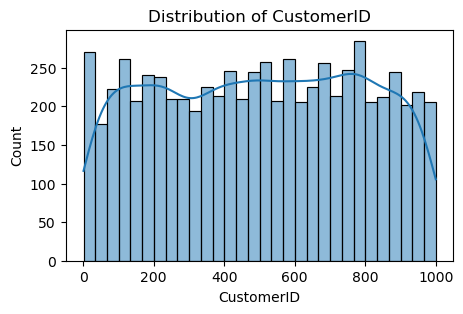

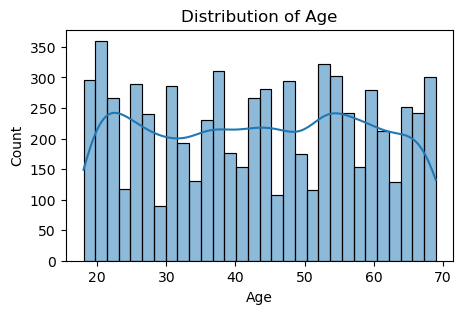

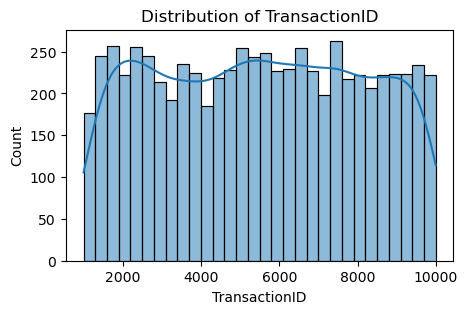

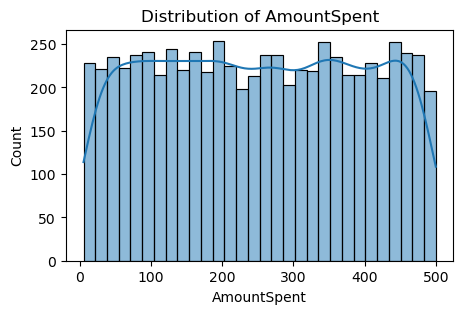

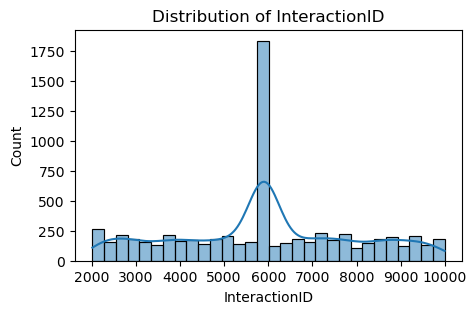

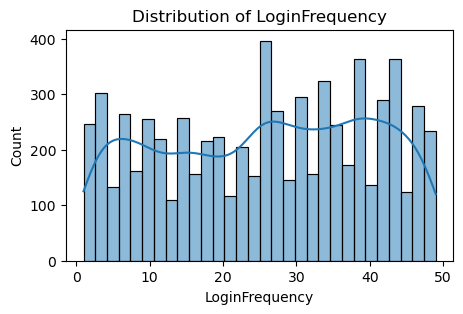

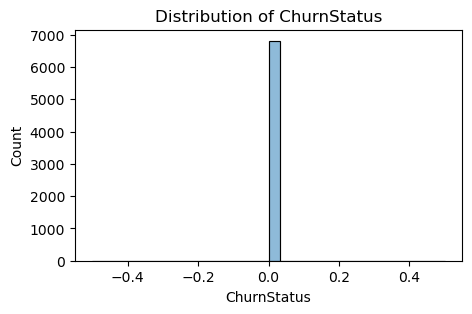

In [24]:
# STEP 6: Exploratory Data Analysis (EDA)


# --- Numeric features distribution ---
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

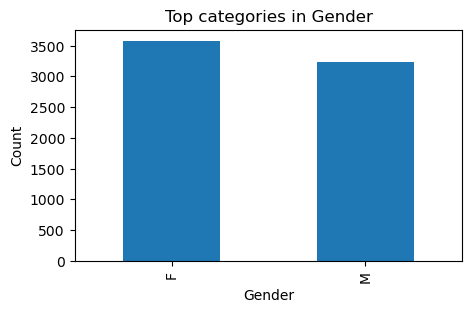

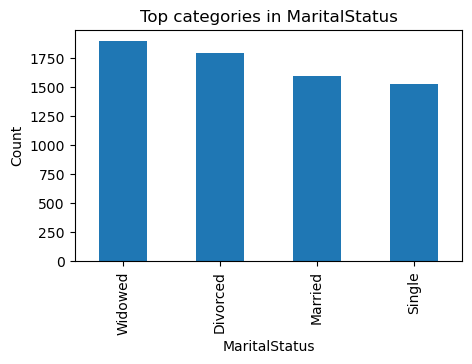

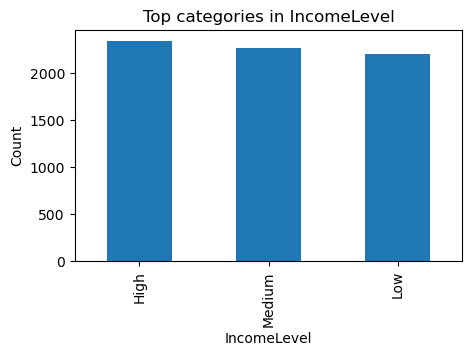

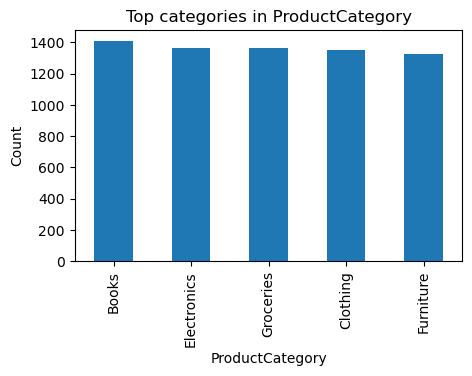

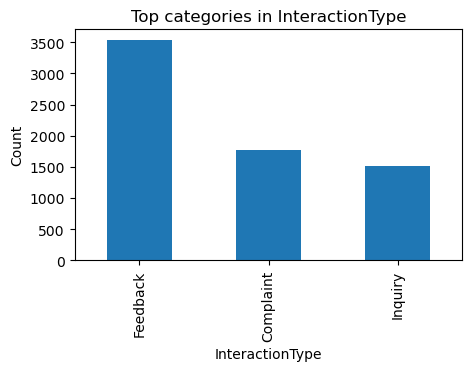

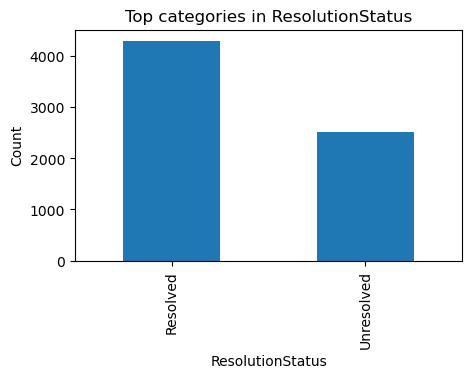

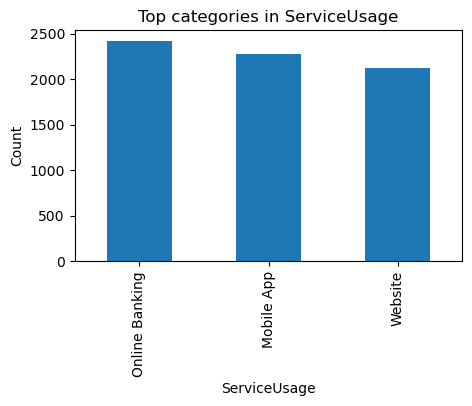

In [25]:

# --- Categorical features distribution ---
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(5,3))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top categories in {col}')
    plt.ylabel("Count")
    plt.show()


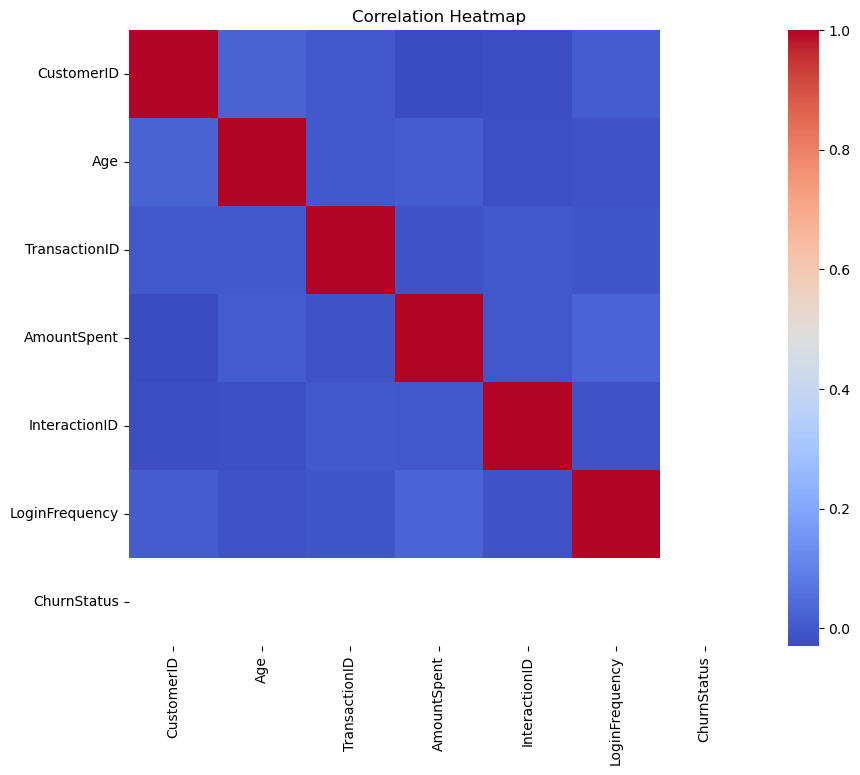

In [26]:
# --- Correlation matrix ---
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [27]:
# STEP 7: Encoding and Scaling
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Scale numeric features (Standardization)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Shape after encoding and scaling:", df.shape)
display(df.head())


Shape after encoding and scaling: (6812, 25)


,CustomerID,Age,TransactionID,TransactionDate,AmountSpent,InteractionID,InteractionDate,LastLoginDate,LoginFrequency,ChurnStatus,Gender_M,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,IncomeLevel_Low,IncomeLevel_Medium,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Furniture,ProductCategory_Groceries,InteractionType_Feedback,InteractionType_Inquiry,ResolutionStatus_Unresolved,ServiceUsage_Online Banking,ServiceUsage_Website
0,-1.741185,1.225036,0.656462,2022-03-27,1.153881,0.218602,2022-03-31,2023-10-21,0.588556,0.0,True,False,True,False,True,False,False,True,False,False,False,True,False,False,False
1,-1.737697,1.421298,0.678129,2022-08-08,-1.376296,-1.269842,2022-03-17,2023-12-05,-1.473886,0.0,True,True,False,False,True,False,True,False,False,False,False,True,False,False,True
2,-1.737697,1.421298,1.610582,2022-07-25,-0.378753,-1.269842,2022-03-17,2023-12-05,-1.473886,0.0,True,True,False,False,True,False,False,True,False,False,False,True,False,False,True
3,-1.737697,1.421298,-0.967014,2022-01-25,-1.051923,-1.269842,2022-03-17,2023-12-05,-1.473886,0.0,True,True,False,False,True,False,False,False,True,False,False,True,False,False,True
4,-1.737697,1.421298,-1.651845,2022-07-24,1.020003,-1.269842,2022-03-17,2023-12-05,-1.473886,0.0,True,True,False,False,True,False,True,False,False,False,False,True,False,False,True


In [28]:
# STEP 8: Save the Cleaned Dataset

df.to_csv("cleaned_customer_churn.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_customer_churn.csv'")


✅ Cleaned dataset saved as 'cleaned_customer_churn.csv'


In [29]:
from IPython.display import FileLink
FileLink("cleaned_customer_churn.csv")


C:\Users\Admin\cleaned_customer_churn.csv

In [30]:
# STEP 9: Summary Report (for your project submission)

report = """
## Data Preparation Report

### Data Sources
Merged data from five sources:
- Customer_Demographics
- Transaction_History
- Customer_Service
- Online_Activity
- Churn_Status

### EDA Findings
- Checked missing values, distributions, and correlations.
- Visualized numeric and categorical variables.
- Verified target class balance (Churn).

### Data Cleaning
- Dropped columns with >50% missing data.
- Imputed numeric values with median and categorical with mode.
- Capped outliers using IQR.
- Removed duplicates.

### Preprocessing
- One-hot encoded categorical variables.
- Standardized numerical columns.
- Output file: cleaned_customer_churn.csv (ready for model training)
"""
print(report)



## Data Preparation Report

### Data Sources
Merged data from five sources:
- Customer_Demographics
- Transaction_History
- Customer_Service
- Online_Activity
- Churn_Status

### EDA Findings
- Checked missing values, distributions, and correlations.
- Visualized numeric and categorical variables.
- Verified target class balance (Churn).

### Data Cleaning
- Dropped columns with >50% missing data.
- Imputed numeric values with median and categorical with mode.
- Capped outliers using IQR.
- Removed duplicates.

### Preprocessing
- One-hot encoded categorical variables.
- Standardized numerical columns.
- Output file: cleaned_customer_churn.csv (ready for model training)

